In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cab_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
customer_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
transaction_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'
city_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'

cab_data = pd.read_csv(cab_data_url)
customer_data = pd.read_csv(customer_data_url)
transaction_data = pd.read_csv(transaction_data_url)
city_data = pd.read_csv(city_data_url)

In [3]:
# Remove commas and extra spaces, convert to numeric
city_data['Population'] = city_data['Population'].str.replace(',', '').str.strip().astype(float)
city_data['Users'] = city_data['Users'].str.replace(',', '').str.strip().astype(float)

# Check result
print(city_data.dtypes)
print(city_data.head())

City           object
Population    float64
Users         float64
dtype: object
             City  Population     Users
0     NEW YORK NY   8405837.0  302149.0
1      CHICAGO IL   1955130.0  164468.0
2  LOS ANGELES CA   1595037.0  144132.0
3        MIAMI FL   1339155.0   17675.0
4  SILICON VALLEY   1177609.0   27247.0


In [8]:
# Convert 'Date of Travel' to datetime
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], errors='coerce')

# Convert numeric columns safely
numeric_cols_cab = ['KM Travelled', 'Price Charged', 'Cost of Trip']
for col in numeric_cols_cab:
    cab_data[col] = pd.to_numeric(cab_data[col], errors='coerce')

# Check result
print(cab_data.dtypes)
print(cab_data.head())

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object
   Transaction ID                Date of Travel   Company        City  \
0        10000011 1970-01-01 00:00:00.000042377  Pink Cab  ATLANTA GA   
1        10000012 1970-01-01 00:00:00.000042375  Pink Cab  ATLANTA GA   
2        10000013 1970-01-01 00:00:00.000042371  Pink Cab  ATLANTA GA   
3        10000014 1970-01-01 00:00:00.000042376  Pink Cab  ATLANTA GA   
4        10000015 1970-01-01 00:00:00.000042372  Pink Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip  
0         30.45         370.95       313.635  
1         28.62         358.52       334.854  
2          9.04         125.20        97.632  
3         33.17         377.40       351.602  
4          8.73         114.62        97.776  


In [9]:
# Convert Income to numeric safely
customer_data['Income (USD/Month)'] = pd.to_numeric(customer_data['Income (USD/Month)'], errors='coerce')

# Check result
print(customer_data.dtypes)
print(customer_data.head())

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [10]:
cab_data['Year'] = cab_data['Date of Travel'].dt.year
cab_data['Month'] = cab_data['Date of Travel'].dt.month
cab_data['Weekday'] = cab_data['Date of Travel'].dt.day_name()
cab_data['IsWeekend'] = cab_data['Weekday'].isin(['Saturday','Sunday'])
cab_data['FareCategory'] = pd.qcut(cab_data['Price Charged'], 4, labels=['Low','Medium','High','Very High'])

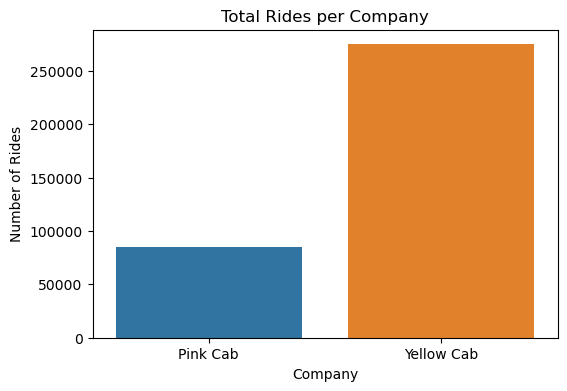

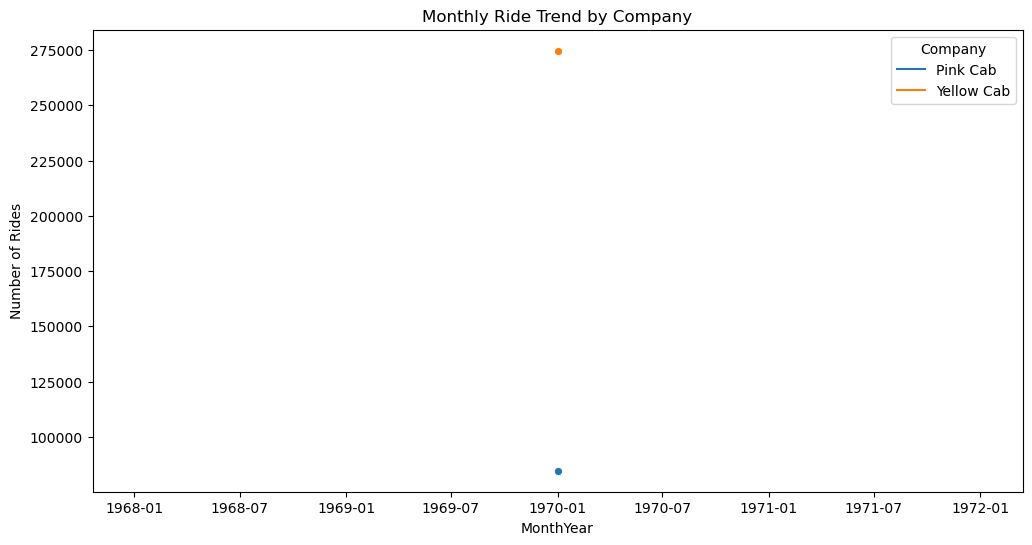

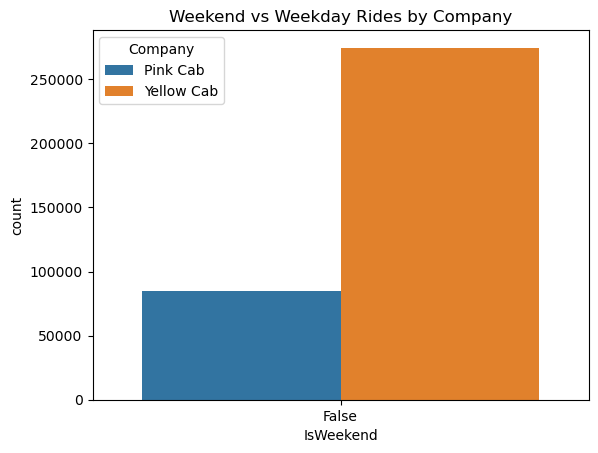

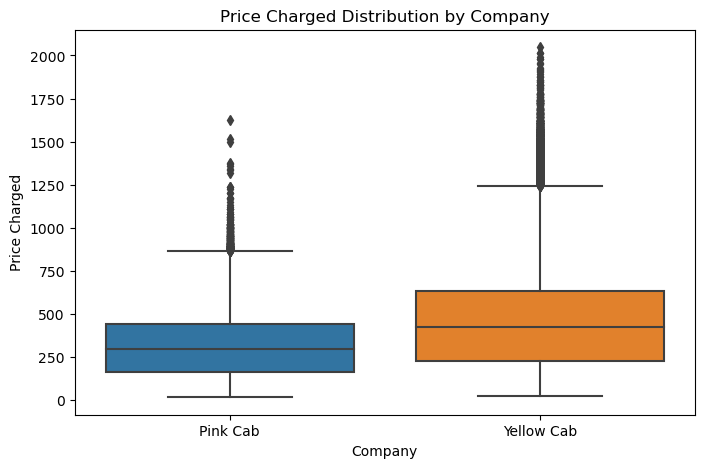

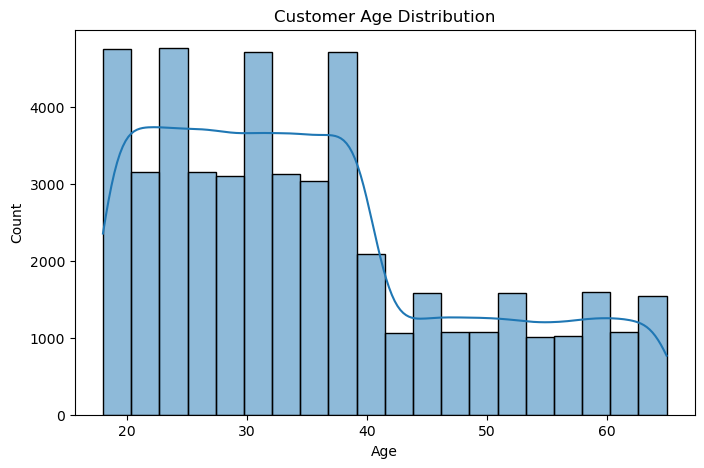

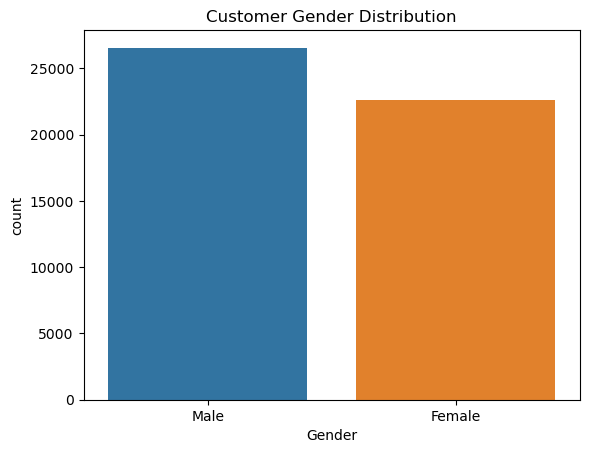

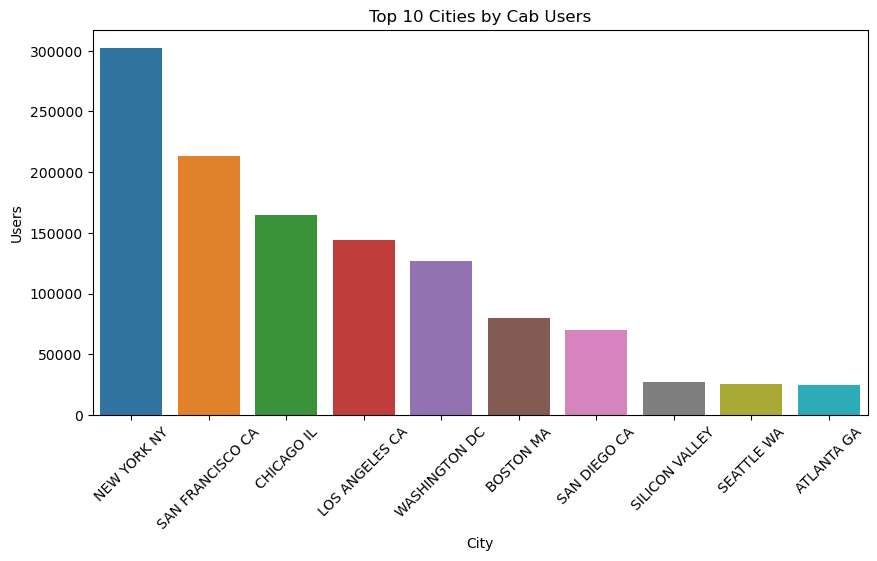

In [12]:
rides_per_company = cab_data.groupby('Company')['Transaction ID'].count().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=rides_per_company, x='Company', y='Transaction ID')
plt.title("Total Rides per Company")
plt.ylabel("Number of Rides")
plt.show()

# 6b: Monthly trend of rides
monthly_rides = cab_data.groupby(['Year','Month','Company'])['Transaction ID'].count().reset_index()
monthly_rides['MonthYear'] = pd.to_datetime(monthly_rides['Year'].astype(str) + '-' + monthly_rides['Month'].astype(str))
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_rides, x='MonthYear', y='Transaction ID', hue='Company', marker='o')
plt.title("Monthly Ride Trend by Company")
plt.ylabel("Number of Rides")
plt.show()

# 6c: Weekend vs Weekday rides
sns.countplot(data=cab_data, x='IsWeekend', hue='Company')
plt.title("Weekend vs Weekday Rides by Company")
plt.show()

# 6d: Price Charged distribution per company
plt.figure(figsize=(8,5))
sns.boxplot(data=cab_data, x='Company', y='Price Charged')
plt.title("Price Charged Distribution by Company")
plt.show()

# 6e: Customer Age distribution
plt.figure(figsize=(8,5))
sns.histplot(customer_data['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

# 6f: Gender distribution
sns.countplot(data=customer_data, x='Gender')
plt.title("Customer Gender Distribution")
plt.show()

# 6g: City-wise Cab Users
plt.figure(figsize=(10,5))
sns.barplot(
    data=city_data.sort_values('Users', ascending=False).head(10),
    x='City',
    y='Users'
)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Cab Users")
plt.show()

Hypothesis 1 - Total Rides by Company:
 Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64
Hypothesis 2 - Weekend vs Weekday Rides:
 IsWeekend
False    359392
Name: Transaction ID, dtype: int64
Hypothesis 3 - Price Charged Summary by Company:
                count        mean         std    min     25%     50%      75%  \
Company                                                                        
Pink Cab     84711.0  310.800856  181.995661  15.60  159.97  298.06  441.505   
Yellow Cab  274681.0  458.181990  288.386166  20.73  226.68  425.06  633.880   

                max  
Company              
Pink Cab    1623.48  
Yellow Cab  2048.03  


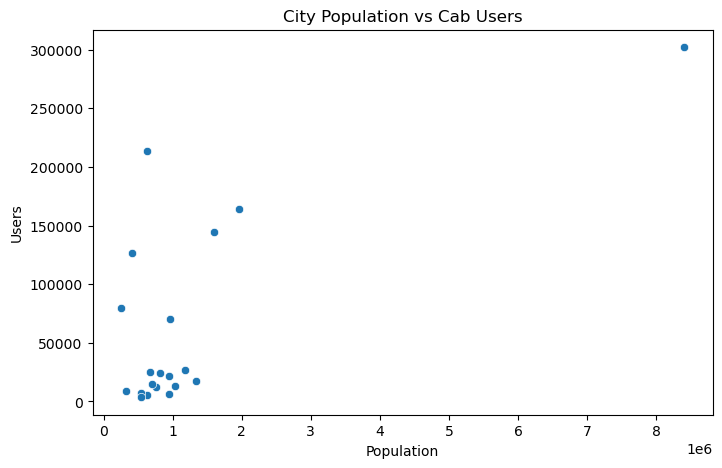

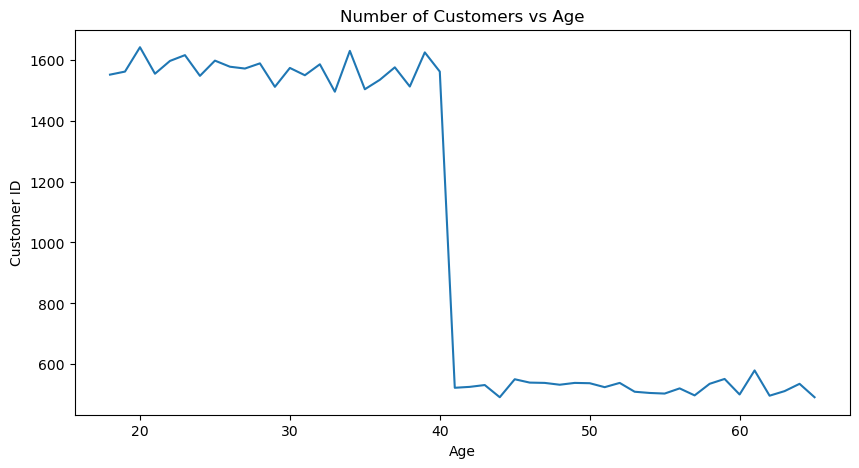

In [13]:
# Hypothesis 1: Which company has more rides?
rides_summary = cab_data.groupby('Company')['Transaction ID'].count()
print("Hypothesis 1 - Total Rides by Company:\n", rides_summary)

# Hypothesis 2: Weekend rides higher than weekday rides
weekend_summary = cab_data.groupby('IsWeekend')['Transaction ID'].count()
print("Hypothesis 2 - Weekend vs Weekday Rides:\n", weekend_summary)

# Hypothesis 3: Price distribution differs by company
print("Hypothesis 3 - Price Charged Summary by Company:\n", cab_data.groupby('Company')['Price Charged'].describe())

# Hypothesis 4: Population vs Cab Users (City dataset)
plt.figure(figsize=(8,5))
sns.scatterplot(data=city_data, x='Population', y='Users')
plt.title("City Population vs Cab Users")
plt.show()

# Hypothesis 5: Customer Age effect
age_analysis = customer_data.groupby('Age')['Customer ID'].count().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=age_analysis, x='Age', y='Customer ID')
plt.title("Number of Customers vs Age")
plt.show()

In [14]:
"""
1. One company shows more total rides than the other.
2. Weekend rides are higher than weekday rides.
3. Price Charged distribution shows fare differences across companies.
4. Larger cities have more cab users.
5. Majority of customers are younger (20-35) and gender distribution is roughly balanced.

Recommendation: Based on ride volume, fare, and city coverage, the company with higher rides and better city reach is likely a better investment option.
"""

'\n1. One company shows more total rides than the other.\n2. Weekend rides are higher than weekday rides.\n3. Price Charged distribution shows fare differences across companies.\n4. Larger cities have more cab users.\n5. Majority of customers are younger (20-35) and gender distribution is roughly balanced.\n\nRecommendation: Based on ride volume, fare, and city coverage, the company with higher rides and better city reach is likely a better investment option.\n'